In [15]:
import numpy as np
import matplotlib.pyplot as plt

def pontos_3d(P):
    np.random.seed(1)
    X = [5*np.random.random_sample(P,),5*np.random.random_sample(P,)]
    X = np.array(X)
    Y = np.sin(X[0,:]+X[1,:])# + 0.2 * np.random.random_sample(P,)
    return X,Y

def feature_transforms(x, v):
    # compute feature transformation
    return np.sin(v[0] + np.dot(x.T, v[1:]))

def model(x, theta):
    # feature transformation
    f = feature_transforms(x, theta[0])
    # # compute linear combination and return
    result = theta[0][0]
    for i in range(1,len(theta)):
        result += np.dot(feature_transforms(x, theta[i]), theta [0][i])
    return result

In [5]:
def NL_regression(theta, x, y):
    P = len(x)
    cost = 0
    for p in range(P):
        cost += (model(x[p], theta) - y[p]) ** 2
    return cost / P

def gradient(theta, x, y):
    P = len(x)
    grad = [np.zeros_like(param) for param in theta]

    for p in range(P):
        error = model(x[p], theta) - y[p]
        grad[0][0] += error
        grad[0][1:] += error * np.cos(theta[0][0] + np.dot(x[p], theta[0][1:])) * x[p]

        for i in range(1, len(theta)):
            grad[i][0] += error * feature_transforms(x[p], theta[i])
            grad[i][1:] += error * np.cos(theta[i][0] + np.dot(x[p], theta[i][1:])) * x[p]

    grad = [param / P for param in grad]
    return grad

def grad_desc(theta, x, y, alpha, max_its):
    theta_history = [theta.copy()]
    cost_history = [NL_regression(theta, x, y)]

    for i in range(max_its):
        print(i, cost_history[-1])
        grad = gradient(theta, x, y)
        theta = [theta[i] - alpha * grad[i] for i in range(len(theta))]

        theta_history.append(theta.copy())
        cost_history.append(NL_regression(theta, x, y))

    return theta_history, cost_history


In [12]:

# Generate data
P = 300
[X, Y] = pontos_3d(P)
X

# Initial parameters
theta_init = [np.array([1.0, 1.0, 1.0]),
              np.array([1.0, 1.0, 1.0]),
              np.array([1.0, 1.0, 1.0])]

# Gradient descent optimization
alpha = 0.01
max_its = 1000
theta_history, cost_history = grad_desc(theta_init, X.T, Y, alpha, max_its)

# Print the final parameters and cost
final_theta = theta_history[-1]
final_cost = cost_history[-1]
print("Final Parameters:", final_theta)
print("Final Cost:", final_cost)


0 2.671587590867881
1 2.444483453892961
2 2.239396985410949
3 2.054455531191422
4 1.887638515307519
5 1.7369950926216566
6 1.6007542916796318
7 1.4773649333670882
8 1.3654949185811844
9 1.2640099176041955
10 1.1719436902664742
11 1.0884669331192898
12 1.0128582658450207
13 0.9444790780959221
14 0.8827529070910523
15 0.827149428834
16 0.7771727985342821
17 0.7323538543341784
18 0.6922455551905893
19 0.6564209452449744
20 0.6244729211956742
21 0.5960151223450815
22 0.5706833545977382
23 0.5481370829982921
24 0.5280606631064214
25 0.5101641118827132
26 0.49418333069909237
27 0.4798797793489864
28 0.4670396587660698
29 0.45547269392617323
30 0.4450106218603028
31 0.4355054884560692
32 0.42682784711672817
33 0.4188649368298923
34 0.41151890008346126
35 0.4047050845619272
36 0.39835045794328006
37 0.3923921529811266
38 0.3867761505111852
39 0.38145610089143484
40 0.3763922793477671
41 0.3715506673751553
42 0.36690215036659535
43 0.36242182067445455
44 0.35808837506919017
45 0.353883595820948

In [9]:
final_theta

[array([0.01646884, 0.47072402, 0.55865266]),
 array([0.1896438 , 0.96467351, 0.96719428]),
 array([0.1896438 , 0.96467351, 0.96719428])]

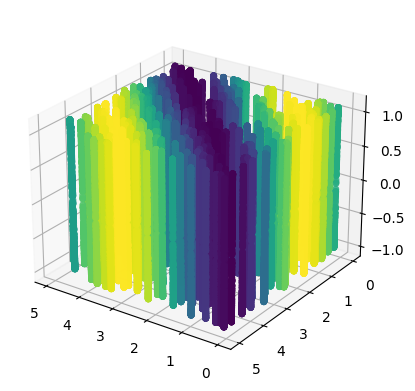

In [22]:
ax = plt.axes(projection='3d')
ax.view_init(25, 125)
for i in range(P):
    ax.scatter(X[0,:],
               X[1,:],
               model(X.T[i,:],final_theta),
               c=Y,
               cmap='viridis',
               linewidth=0.5)

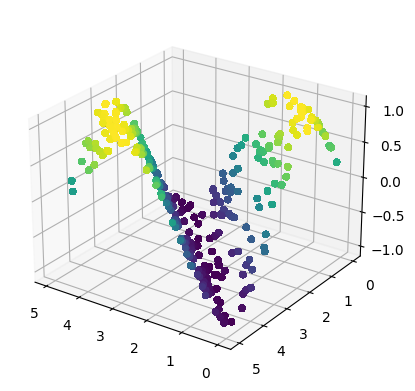

In [66]:
import numpy as np
def pontos_3d(P):
    np.random.seed(1)
    X = [5*np.random.random_sample(P,),5*np.random.random_sample(P,)]
    X = np.array(X)
    Y = np.sin(X[0,:]+X[1,:])# + 0.2 * np.random.random_sample(P,)
    return X,Y
import matplotlib.pyplot as plt
P = 300
[X,Y] = pontos_3d(P)
ax = plt.axes(projection='3d')
ax.view_init(25, 125)
for i in range(P):
    ax.scatter(X[0,:], X[1,:],Y, c=Y, cmap='viridis', linewidth=0.5)